<a href="https://colab.research.google.com/github/JorgeV92/Alan/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

dim_theta = 10
data_num = 1000
scale = .1

theta_true = np.ones((dim_theta,1))
print('True theta:', theta_true.reshape(-1))

A = np.random.uniform(low=-1.0, high=1.0, size=(data_num,dim_theta))
y_data = A @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(data_num, 1))

A_test = np.random.uniform(low=-1.0, high=1.0, size=(50, dim_theta))
y_test = A_test @ theta_true + np.random.normal(loc=0.0, scale=scale, size=(50, 1))

True theta: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Solving for the exact mean squared loss (solving Ax = b)

In [2]:
print('Not implemented.')

'''
Hints:
1. See the least squares solution to Ax = b (when it is covered in lecture).

2. Use Numpy functions like Numpy's linear algebra functions to solve for x in Ax = b.
In fact, the linear algebra module is already imported with ```import numpy.linalg as la```.

3. Use the defined variable A in Ax = b. Use y_data as b. Use theta_pred as x.
'''
theta_pred = la.inv(A.T @ A) @ (A.T @ y_data) # TODO: Implement the analytical solution

print('Empirical theta', theta_pred.reshape(-1))

Not implemented.
Empirical theta [0.99728919 1.00200276 1.00596315 0.9957438  0.99640632 0.99592733
 1.00729374 0.98866734 1.00437946 0.9992974 ]


# SGD Variants Noisy Function

In [3]:
batch_size = 1
max_iter = 1000
lr = 0.001
theta_init = np.random.random((10,1)) * 0.1

In [4]:
def noisy_val_grad(theta_hat, data_, label_, deg_=2.):
    gradient = np.zeros_like(theta_hat)
    loss = 0
    
    for i in range(data_.shape[0]):
        x_ = data_[i, :].reshape(-1,1)
        y_ = label_[i, 0]
        err = np.sum(x_ * theta_hat) - y_
        
        #print('Not implemented.')

        '''
        Hints:
        1. Find the gradient and loss for each data point x_.
        2. For grad, you need err, deg_, and x_.
        3. For l, you need err and deg_ only.
        4. Checkout the writeup for more hints.
        '''
        grad = deg_ * np.sign(err) * np.abs(err) ** (deg_ - 1) * x_ # TODO: Implement the analytical gradient
        l = np.abs(err) ** deg_ # TODO: Implement the loss function
        
        loss += l / data_.shape[0]
        gradient += grad / data_.shape[0]
        
    return loss, gradient

# Running SGD Variants

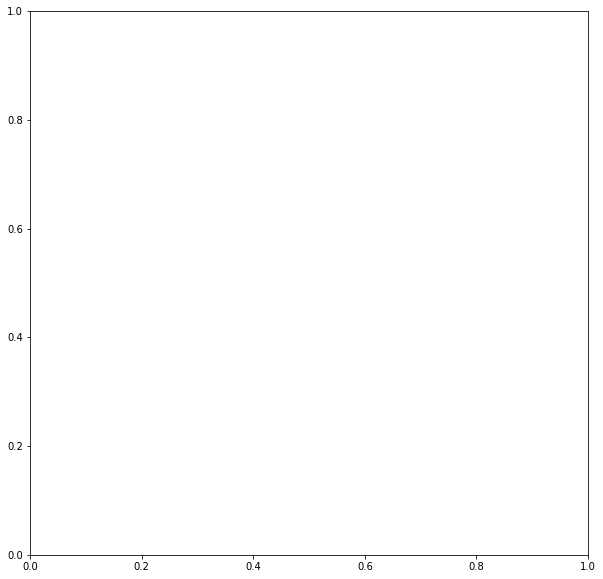

In [5]:
#@title Parameters
deg_ = [0.4,0.7,1.,2.,3.,5.] #@param {type: "number"}
num_rep = 10 #@param {type: "integer"}
max_iter = 1000 #@param {type: "integer"}
fig, ax = plt.subplots(figsize=(10,10))
best_vals = {}
test_exp_interval = 50 #@param {type: "integer"}
grad_artificial_normal_noise_scale = 0. #@param {type: "number"}

adam 0
adam done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
Theta: [[0.39157642]
 [0.35418153]
 [0.27762608]
 [0.33877099]
 [0.40180098]
 [0.27248224]
 [0.39883628]
 [0.38045435]
 [0.39551237]
 [0.33030538]]
[2.77341436 2.53422739 2.37443745 2.25866778 2.17292755 2.09309294
 2.0196538  1.95577864 1.8863692  1.82413833 1.76922385 1.71942325
 1.66982538 1.61609774 1.56417326 1.51566555 1.46857251 1.42717097
 1.38839057 1.34902564]
sgd 0
sgd done
test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training
The elements of test_loss_np are the test loss values computed in each replicate and training stage.
Theta: [[0.47160525]
 [0.5059031 ]
 [0.451809  ]
 [0.47615418]
 [0.54700807]
 [0.42735072]
 [0.50546997]
 [0.50709167]
 [0.49622354]
 [0.44887903]]
[2.77341436 2.60616007 2.46518652 2

Text(0.5, 0, 'Updates')

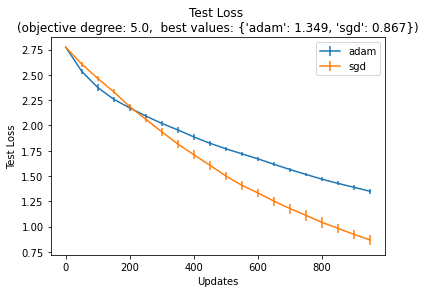

In [6]:
for method_idx, method in enumerate(['adam', 'sgd']):
    test_loss_mat = []
    train_loss_mat = []
    
    for replicate in range(num_rep):
        if replicate % 20 == 0:
            print(method, replicate)
            
        if method == 'adam':
            #print('Adam Not implemented.')
            beta_1 = 0.9
            beta_2 = 0.999
            m = np.zeros_like(theta_pred) # TODO: Initialize parameters
            v = np.zeros_like(theta_pred)
            epsilon = 1e-8

        if method == 'adagrad':
            #print('Adagrad Not implemented.')
            epsilon =  1e-8 # TODO: Initialize parameters
            squared_sum = np.zeros_like(theta_pred)
            
        theta_hat = theta_init.copy()
        test_loss_list = []
        train_loss_list = []

        for t in range(max_iter):
            idx = np.random.choice(data_num, batch_size) # Split data
            train_loss, gradient = noisy_val_grad(theta_hat, A[idx,:], y_data[idx,:], deg_=deg_[3])
            #print(gradient.shape)
            artificial_grad_noise = np.random.randn(10, 1) * grad_artificial_normal_noise_scale + np.sign(np.random.random((10, 1)) - 0.5) * 0.5
            gradient = gradient + artificial_grad_noise
            train_loss_list.append(train_loss)
            
            if t % test_exp_interval == 0:
                test_loss, _ = noisy_val_grad(theta_hat, A_test[:,:], y_test[:,:], deg_=deg_[3])
                test_loss_list.append(test_loss)                
            
            if method == 'adam':
                #print('Adam Not implemented.') # TODO: Implement Adam
                m = beta_1 * m  + (1 - beta_1) * gradient
                v = beta_2 * v + (1 - beta_2) * gradient**2
                m_hat = m / (1 - beta_1 ** t+1)
                v_hat = v / (1 - beta_2 ** t+1)
                theta_hat = theta_hat - lr * m_hat / (np.sqrt(v_hat) + epsilon)
            
            elif method == 'adagrad':
                #print('Adagrad Not implemented.')
                squared_sum = squared_sum + gradient*gradient # TODO: Implement Adagrad
                theta_hat = theta_hat - lr * gradient / (np.sqrt(squared_sum) + epsilon)
            
            elif method == 'sgd':
                theta_hat = theta_hat - lr * gradient
        
        test_loss_mat.append(test_loss_list)
        train_loss_mat.append(train_loss_list)
        
    print(method, 'done')
    x_axis = np.arange(max_iter)[::test_exp_interval]
    
    print('test_loss_np is a 2d array with num_rep rows and each column denotes a specific update stage in training')
    print('The elements of test_loss_np are the test loss values computed in each replicate and training stage.')
    test_loss_np = np.array(test_loss_mat)
    
    print("Theta:", theta_hat)
    '''
    Hints:
    1. Use test_loss_np in np.mean() with axis = 0
    '''
    test_loss_mean = np.mean(test_loss_np, axis=0).reshape(-1) # TODO: Calculate the mean test loss
    print(test_loss_mean)
    '''
    Hints:
    1. Use test_loss_np in np.std() with axis = 0 
    2. Divide by np.sqrt() using num_rep as a parameter
    '''
    test_loss_se = np.std(test_loss_np, axis=0).reshape(-1) / np.sqrt(num_rep) # TODO: Calculate the standard error for test loss

    plt.errorbar(x_axis, test_loss_mean, yerr=2.5*test_loss_se, label=method)
    best_vals[method] = min(test_loss_mean)
    best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_[5]},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')

In [7]:

best_vals

{'adam': 1.349, 'sgd': 0.867}

Text(0.5, 0, 'Updates')

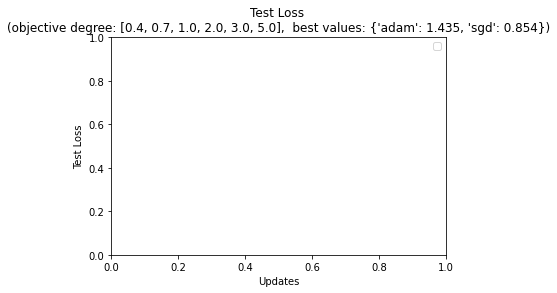

In [ ]:
best_vals = { k: int(v * 1000) / 1000. for k,v in best_vals.items() } # A weird way to round numbers
plt.title(f'Test Loss \n(objective degree: {deg_},  best values: {best_vals})')
plt.ylabel('Test Loss')
plt.legend()
plt.xlabel('Updates')